I'm gonna try to use decision tree algorithm with Bid won or lost as my target variable to help the sales team who are going on 1 on 1 pitching (Non tender) to do their homework as to what other parameters they need to take care of so that their chances of winning the tender in 1 on 1 pitches are higher are they bring profit to their manufacturing company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_excel('/Users/abhishekrotti/Desktop/Module 6 Exam/data.xlsx', sheet_name='Raw Data')

In [8]:
#deleting unneccesary rows like ids and market amount as it doesnt give me any insight except for the how much
#company is winning or loosing money.
#del df['Deal Id']
#del df['company id']
del df['won / lost market EUR']

In [35]:
df.replace('Lost', 0, inplace=True)

In [36]:
df.head()

,End User Account Facility Size,End User Account Country,End User Acc. Coverage Type,End User Account Legal Structure,End User Acc. ISIC MED,Business Type,Fulfilled PM Milestone,Incumbent vendor,Opportunity Type,Oppty System Department,Reason,Sales type,System Diagram,Tender,System status,won / lost market EUR
0,Large,Australia,Not assigned,Not assigned,LABORATORY DIAGNOSTICS,Own Business,PM010,#,Equipment,Not assigned,Other,Equip New - New System,Product 9,Non-Tender,0,67266.69
1,Not assigned,Australia,Not assigned,Not assigned,HOSPITAL ACTIVITIES,Own Business,PM010,#,Equipment,Not assigned,Other,Equip New - New System,Product 9,Non-Tender,0,67266.69
2,Not assigned,Australia,Not assigned,Not assigned,HOSPITAL ACTIVITIES,Own Business,PM010,#,Equipment,Not assigned,Other,Equip New - New System,Product 9,Non-Tender,0,672666.86
3,Large,Australia,Not assigned,Not assigned,HOSPITAL ACTIVITIES,Own Business,PM010,#,Equipment,Not assigned,Other,Equip New - New System,Product 9,Non-Tender,0,67266.69
4,Not assigned,Australia,Not assigned,Not assigned,#,Own Business,PM010,#,Equipment,Not assigned,Other,Equip New - New System,Product 9,Non-Tender,0,336333.43


In [37]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5077 entries, 0 to 5076
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   End User Account Facility Size    5077 non-null   object 
 1   End User Account Country          5077 non-null   object 
 2   End User Acc. Coverage Type       5077 non-null   object 
 3   End User Account Legal Structure  5077 non-null   object 
 4   End User Acc. ISIC MED            5077 non-null   object 
 5   Business Type                     5077 non-null   object 
 6   Fulfilled PM Milestone            5077 non-null   object 
 7   Incumbent vendor                  5077 non-null   object 
 8   Opportunity Type                  5077 non-null   object 
 9   Oppty System Department           5077 non-null   object 
 10  Reason                            5077 non-null   object 
 11  Sales type                        5077 non-null   object 
 12  System

In [38]:
df.count()

End User Account Facility Size      5077
End User Account Country            5077
End User Acc. Coverage Type         5077
End User Account Legal Structure    5077
End User Acc. ISIC MED              5077
Business Type                       5077
Fulfilled PM Milestone              5077
Incumbent vendor                    5077
Opportunity Type                    5077
Oppty System Department             5077
Reason                              5077
Sales type                          5077
System Diagram                      5077
Tender                              5077
System status                       5077
won / lost market EUR               5077
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
df_new=pd.get_dummies(data=df)

In [42]:
df_new.columns

Index(['System status', 'won / lost market EUR',
       'End User Account Facility Size_Large',
       'End User Account Facility Size_Medium',
       'End User Account Facility Size_Not assigned',
       'End User Account Facility Size_Small',
       'End User Account Country_Australia',
       'End User Account Country_Bangladesh',
       'End User Account Country_Bhutan', 'End User Account Country_Brunei',
       ...
       'System Diagram_Product 3', 'System Diagram_Product 4',
       'System Diagram_Product 5', 'System Diagram_Product 6',
       'System Diagram_Product 7', 'System Diagram_Product 8',
       'System Diagram_Product 9', 'Tender_Non-Tender',
       'Tender_Private Tender', 'Tender_Public Tender'],
      dtype='object', length=155)

In [43]:
X=df_new.iloc[:,df_new.columns != 'System status']

In [44]:
y=df_new['System status']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [55]:
c=DecisionTreeClassifier(max_depth=20).fit(X_train,y_train)

In [56]:
c.score(X_train,y_train)

1.0

In [57]:
c.score(X_test,y_test)

0.9862204724409449

In [58]:
from sklearn.metrics import classification_report

In [59]:
y_preds = c.predict(X_test)

In [60]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       823
           1       0.99      0.98      0.98       701

    accuracy                           0.99      1524
   macro avg       0.99      0.99      0.99      1524
weighted avg       0.99      0.99      0.99      1524



In [61]:
from sklearn.metrics import roc_curve, auc

In [62]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)


roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.9857615314348709

AUC score is 98% LOL, i have definitely made a blunder somewhere but not able to figure out where.

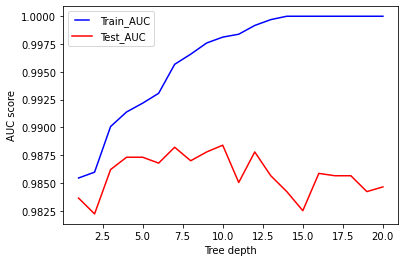

In [64]:
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   c = DecisionTreeClassifier(max_depth=max_depth)
   c.fit(X_train, y_train)
   train_pred = c.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_preds =c.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths,train_results,'b',label="Train_AUC")
line2, = plt.plot(max_depths, test_results,'r', label="Test_AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

'''
Im gonna choose max depth as 15 as the curve is flattening after 15 and max depth there after
is not having much impact
'''

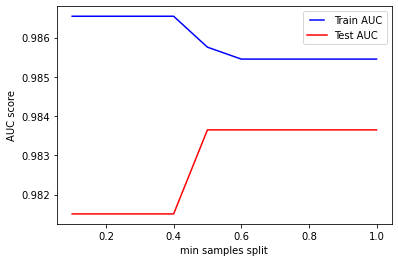

In [74]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   c = DecisionTreeClassifier(min_samples_split=min_samples_split)
   c.fit(X_train, y_train)
   train_pred = c.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_preds = c.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [73]:
c=DecisionTreeClassifier(max_depth=15).fit(X_train,y_train)
print(c.score(X_train,y_train))
print(c.score(X_test,y_test))

1.0
0.9868766404199475


1. Test accuracy more or less closer to train accuracy.
2. Im not sure why the train accuracy is 1.0 which is outright wrong. It might possible that the System status is Won and Loss equally or maybe close to equal.
3. We can build a UI model for the company, like a dashboard, where they input their variables and check if that would lead them to either make or break the deal.
4. Based on the model prediction maybe the sales persons now know which areas to target in order to have highest chance of the deal being successful.
5. I have not shown any EDA through code here as i manually analyzed the data in excel sheet with filters to check whats the percentage of impact on Lost and Won category by other variables.
6. I have explained my analysis and the area i wanted to target to help this company out with sales in the PPT attached